In [1]:
# Import public packages and functions
import os
import pandas as pd
import numpy as np
import sys
import json
from pathlib import Path

import seaborn as sns
import matplotlib.pyplot as plt
import scikit_posthocs as sp

# inserting the lib folder to the compiler
sys.path.insert(0, './lib')
sys.path.insert(0, './utils/')

import utils_plotting_spectogram
import utils_accelerometer

from lib_accelerometer import ACCELEROMETER 
from lib_data import DATA_IO

In [2]:
PATH_CURR  = os.path.abspath(os.curdir)    # current code
PATH       = (str(Path(PATH_CURR).parent)) # data repository: upper directory where datasets situated
SUB        = '016'

In [6]:
# 1. Load event history of patient
df_events_016 = pd.read_csv(DATA_IO.path_events_dataframe + "SUB_"+ SUB +"_EVENTS_ACC.csv")
# 2. load accelerometer data
acc_016       = ACCELEROMETER(PATH, SUB)

... pickle loading: C:\Users\a.kaymak\Desktop\Papers\2025 Parkinson Dyskinesia LFP-ECG\files\data\sub-016\016_mergedData_v4.0_acc_right.P
... pickle loading: C:\Users\a.kaymak\Desktop\Papers\2025 Parkinson Dyskinesia LFP-ECG\files\data\sub-016\016_mergedData_v4.0_acc_left.P


In [7]:
acc_events = utils_accelerometer.create_accelerometer_event_dictionary(df_events_016, acc_016, acc_016.fs, t_observation=4)
colors     = utils_plotting_spectogram.colors

# 1. PLOT SPECTROGRAM OF ACTIVITIES

In [8]:
fs             = acc_016.fs
event_category = "tapping"
dys_severity   = "all"
alignment      = "onset"

event_array    = acc_events[event_category][dys_severity][alignment]
data           = event_array[1]
time_vec       = utils_accelerometer.get_event_time_vector(np.array(data), fs, alignment=alignment)

## 1.1 Average Spectogram for Single Event

<Figure size 640x480 with 0 Axes>

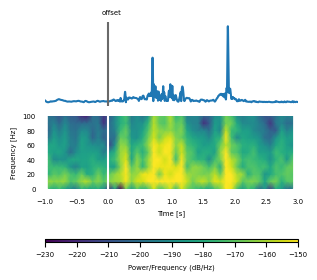

In [9]:
utils_plotting_spectogram.plot_single_event_and_spectogram(data, time_vec, fs, alignment=alignment)

## 1.2 Average Spectogram for Event Category

<Figure size 640x480 with 0 Axes>

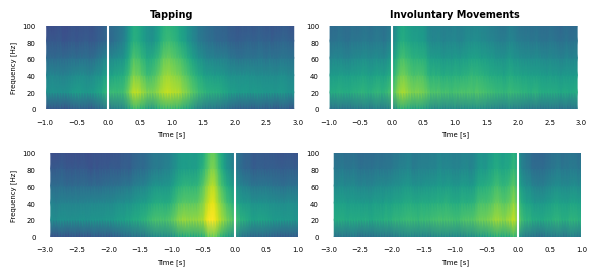

In [11]:
utils_plotting_spectogram.plot_average_spectogram_for_event_category(acc_events, time_vec, fs)

## 1.3 Average Spectogram for Event Category by Dyskinesia Severity  

<Figure size 640x480 with 0 Axes>

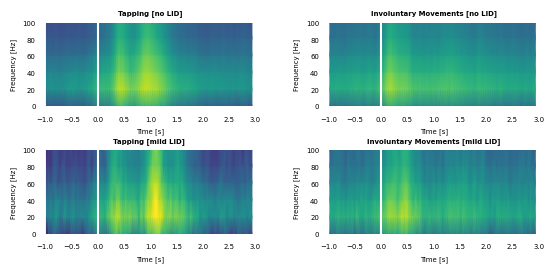

In [12]:
utils_plotting_spectogram.plot_average_spectogram_for_dyskinesia_severity(acc_events, time_vec, fs)